# 1. Get source code

In [1]:
# Clone repo from Github
!git clone https://github.com/max-schaefer-dev/on-cloud-n-19th-place-solution.git

Cloning into 'on-cloud-n-19th-place-solution'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 238 (delta 138), reused 173 (delta 73), pack-reused 0
Receiving objects: 100% (238/238), 5.49 MiB | 25.67 MiB/s, done.
Resolving deltas: 100% (138/138), done.


# 2. Install requirements & restart kernel

In [ ]:
# Change working dir. to repo dir. and install
%cd on-cloud-n-19th-place-solution
!pip install -r requirements.txt

In [3]:
# restarting kernel
!condacolab KERNEL RESTART
print("Restarting of kernel...")
get_ipython().kernel.do_shutdown(True)

/bin/bash: condacolab: command not found
Restarting of kernel...


{'restart': True, 'status': 'ok'}

In [4]:
# # Configuration for training
# %load_ext autoreload
# %autoreload 2
# import warnings
# warnings.filterwarnings("ignore")

# 3. Get data

**!!Competition data is not availale publicly yet.!!**  
**This part will be edited as soon as data is available**

Download the pseudo labeled data. Pseudo labeled data should be placed in data/pseudo_labels

```
../on-cloud-n-19th-place-solution/
├── LICENSE.md
├── ...
├── configs
│   ├── efficientnet-b1-unet-512.yaml
│   ├── resnet34-unet-512.*yaml*
│   └── resnext50_32x4d-unet-512.yaml
├── data
│   ├── train_features
│   │   ├── train_chip_id_1
│   │   │   ├── B02.tif
│   │   │   ├── B03.tif
│   │   │   ├── B04.tif
│   │   │   └── B08.tif
│   │   └── ...
│   ├── train_labels
│       ├── train_chip_id_1.tif
│       ├── ...
│       ...
│   ├── metadata_updated.csv
│   └── pseudo_labels.zip
├── train_metadata.csv
...
```

# 4. Training

In [3]:
# change working dir
import os

if os.getcwd() != '/content/on-cloud-n-19th-place-solution':
    %cd on-cloud-n-19th-place-solution
    print('> Changed working directory to', os.getcwd())

/content/on-cloud-n-19th-place-solution
changed working directory to /content/on-cloud-n-19th-place-solution


In [ ]:
# Train all models
!python train.py --fast-dev-run 1 --cfg './configs/resnet34-unet-512.yaml'
!python train.py --fast-dev-run 1 --cfg './configs/efficientnet-b1-unet-512.yaml'
!python train.py --fast-dev-run 1 --cfg './configs/resnext50_32x4d-unet-512.yaml'

# 5.1 Inference after training

In [14]:
# grab random n samples from training set
!mkdir /content/on-cloud-n-19th-place-solution/data/test_features

import glob, random

n = 1000

train_f_paths = glob.glob('/content/on-cloud-n-19th-place-solution/data/train_features/*')
train_f_batch = random.choices(train_f_paths, k=n)

for p in train_f_batch:
    !cp -r {p} /content/on-cloud-n-19th-place-solution/data/test_features

In [ ]:
# create .tif prediction-files and save them in data/predictions 
!python predict.py --model-dir './output/resnet34-unet-512x512' --ensemble 1 --tta 1 --batch-size 8

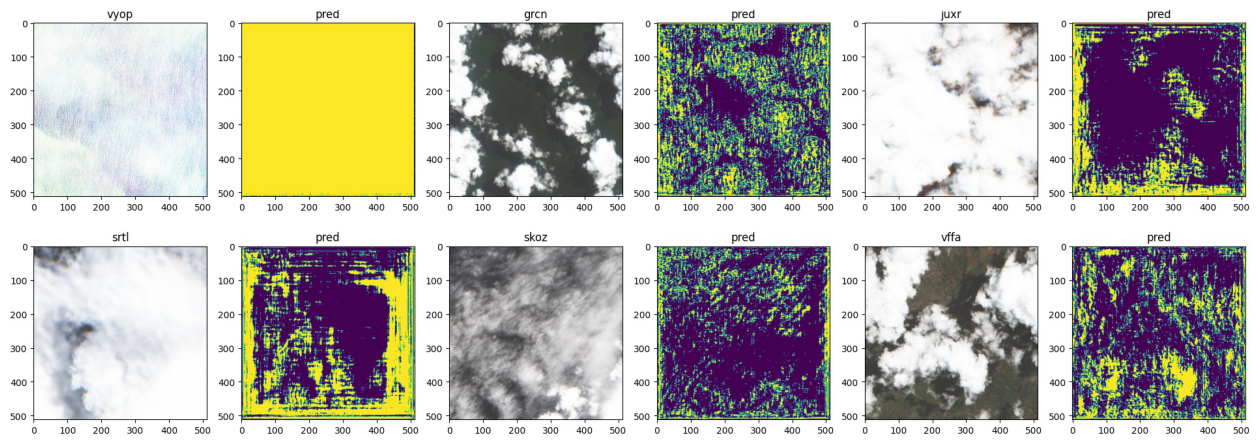

In [26]:
# plot batch of predictions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./data/predictions/prediction_sample.jpg')
plt.figure(figsize=(16, 6), dpi=100)
plt.imshow(img)
plt.axis('off')
plt.show()

# 5.2 Inference without training
### 1. Download model weights from [here](https://www.kaggle.com/maxschfer/ocn-checkpoints)
### 2. Create model folders in the output folder. Place the weights and its corresponding config files into the model folders
> Before predict, file tree would look like this:
```
../on-cloud-n-19th-place-solution/
...
├── output
│    ├── Resnet34-Unet-512x512
│    │    ├── resnet34-unet-512.yaml
│    │    └── resnet34-unet.pt
│    ├── EfficientNetB1-Unet-512x512
│    └── Resnext50-Unet-512x512
...
 
### 3. Run script below

In [10]:
# copy best weights
!mkdir output
!mkdir output/resnet34-unet-512x512
!mkdir output/efficientnet-b1-unet-512x512
!mkdir output/resnext50_32x4d-unet-512x512
!cp /content/gdrive/MyDrive/on-cloud-n/models/run-3ueu4jd4.pt /content/on-cloud-n-19th-place-solution/output/efficientnet-b1-unet-512x512/efficientnet-b1-unet.pt
!cp /content/on-cloud-n-19th-place-solution/configs/efficientnet-b1-unet-512.yaml /content/on-cloud-n-19th-place-solution/output/efficientnet-b1-unet-512x512/
!cp /content/gdrive/MyDrive/on-cloud-n/models/run-2y2ouvhq.pt /content/on-cloud-n-19th-place-solution/output/resnet34-unet-512x512/resnet34-unet.pt
!cp /content/on-cloud-n-19th-place-solution/configs/resnet34-unet-512.yaml /content/on-cloud-n-19th-place-solution/output/resnet34-unet-512x512/
!cp /content/gdrive/MyDrive/on-cloud-n/models/run-1zi3fk90.pt /content/on-cloud-n-19th-place-solution/output/resnext50_32x4d-unet-512x512/resnext50_32x4d-unet.pt
!cp //content/on-cloud-n-19th-place-solution/configs/resnext50_32x4d-unet-512.yaml /content/on-cloud-n-19th-place-solution/output/resnext50_32x4d-unet-512x512/

In [19]:
!python predict.py --model-dir 'output/resnet34-unet-512x512' --ensemble 1 --tta 3 --batch-size 8

> INFERENCE: MODELS: 3, TTA: 3
2022-03-21 10:35:59.121 | INFO     | __main__:predict:61 - Loading test metadata
2022-03-21 10:35:59.540 | INFO     | __main__:predict:65 - Found 952 chips
2022-03-21 10:36:04.852 | INFO     | __main__:predict:99 - Predicting batch 0 of 119
2022-03-21 10:36:08.188 | INFO     | __main__:predict:99 - Predicting batch 1 of 119
2022-03-21 10:36:11.256 | INFO     | __main__:predict:99 - Predicting batch 2 of 119
2022-03-21 10:36:14.338 | INFO     | __main__:predict:99 - Predicting batch 3 of 119
2022-03-21 10:36:17.393 | INFO     | __main__:predict:99 - Predicting batch 4 of 119
2022-03-21 10:36:20.445 | INFO     | __main__:predict:99 - Predicting batch 5 of 119
2022-03-21 10:36:23.512 | INFO     | __main__:predict:99 - Predicting batch 6 of 119
2022-03-21 10:36:26.570 | INFO     | __main__:predict:99 - Predicting batch 7 of 119
2022-03-21 10:36:29.646 | INFO     | __main__:predict:99 - Predicting batch 8 of 119
2022-03-21 10:36:32.724 | INFO     | __main__:pr

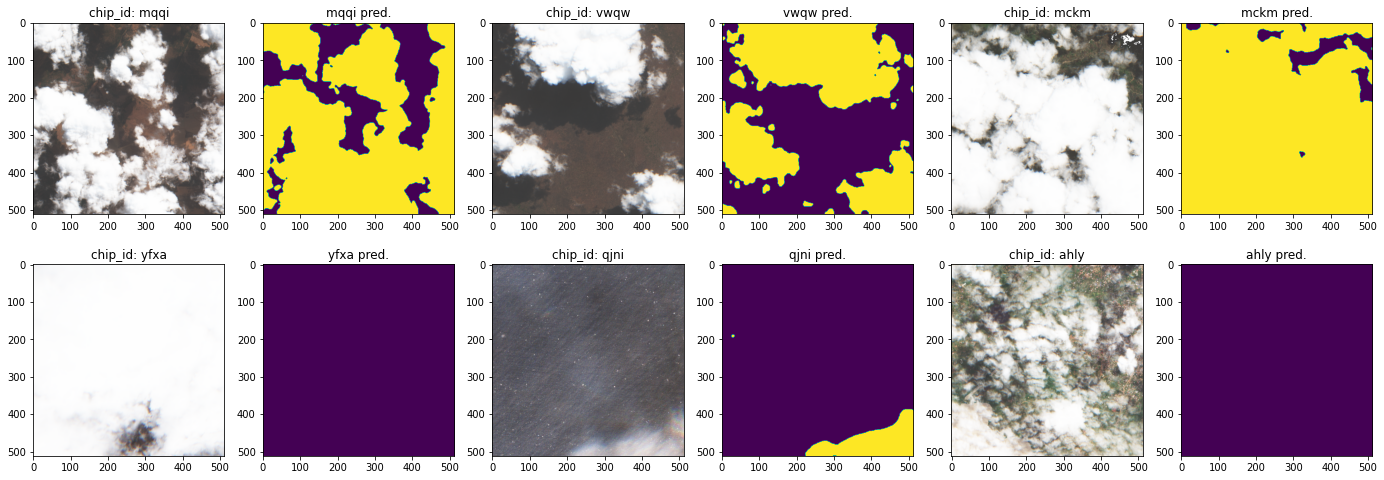

In [30]:
from utils.visualize import save_prediction_as_jpg
from pathlib import Path

pred_dir = Path('data/predictions')

# saves and plots 6 images with corresponding predictions
save_prediction_as_jpg(pred_dir)